In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [4]:
train = '/content/drive/MyDrive/Tumor'
test = '/content/drive/MyDrive/BrainTumorMRI/Tumor'

In [5]:
#path :

#data_path='/content/drive/MyDrive/Colab Notebooks/Data/MAJOR PROJECT/AugumentedData/'

#yes = data_path+'yes'

#no = data_path+'no'

In [6]:
#importing the vgg 19 and by default i'm using the imagenet weights 

vgg = VGG19(input_shape=IMAGE_SIZE+[3],include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [7]:
#don't train existing model
for layer in vgg.layers:
  layer.trainable=False

In [8]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Tumor/*')

In [9]:
folders

['/content/drive/MyDrive/Tumor/yes', '/content/drive/MyDrive/Tumor/no']

In [10]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

#creating a model object
model = Model(inputs=vgg.input,outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
model.compile (loss = 'categorical_crossentropy',optimizer = 'adam',metrics = 'accuracy')

In [14]:
 from keras.preprocessing.image import ImageDataGenerator

In [15]:
 train_data = ImageDataGenerator(rescale= 1/255,  shear_range=0.2,zoom_range=0.2, horizontal_flip=True)

In [16]:
 test_data = ImageDataGenerator(rescale=1/255)

In [17]:
train_final = train_data.flow_from_directory('/content/drive/MyDrive/Tumor', target_size=(224,224))

Found 2998 images belonging to 2 classes.


In [18]:
test_final = test_data.flow_from_directory('/content/drive/MyDrive/BrainTumorMRI/Tumor', target_size=(224,224))

Found 253 images belonging to 2 classes.


In [21]:
tumor_vgg = model.fit_generator(train_final, validation_data=test_final,epochs=6, steps_per_epoch=len(train_final), validation_steps=len(test_final))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/6
94/94 [==============================] - 339s 4s/step - loss: 0.2143 - accuracy: 0.9163 - val_loss: 1.6183 - val_accuracy: 0.5613
Epoch 2/6
94/94 [==============================] - 50s 528ms/step - loss: 0.1609 - accuracy: 0.9406 - val_loss: 1.2866 - val_accuracy: 0.6324
Epoch 3/6
94/94 [==============================] - 49s 525ms/step - loss: 0.1324 - accuracy: 0.9556 - val_loss: 1.6092 - val_accuracy: 0.6087
Epoch 4/6
94/94 [==============================] - 49s 525ms/step - loss: 0.1207 - accuracy: 0.9560 - val_loss: 1.9470 - val_accuracy: 0.5731
Epoch 5/6
94/94 [==============================] - 48s 512ms/step - loss: 0.0896 - accuracy: 0.9713 - val_loss: 1.6000 - val_accuracy: 0.6245
Epoch 6/6
94/94 [==============================] - 50s 526ms/step - loss: 0.0809 - accuracy: 0.9773 - val_loss: 1.7122 - val_accuracy: 0.6285


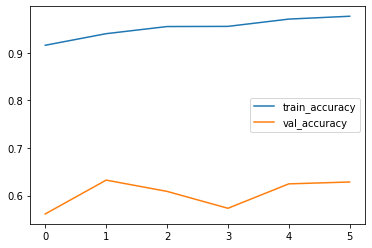

In [22]:
plt.plot(tumor_vgg.history['accuracy'], label='train_accuracy')
plt.plot(tumor_vgg.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

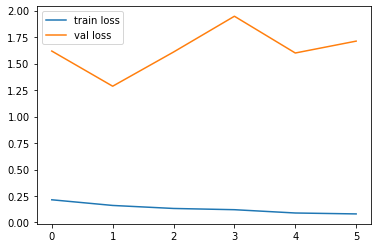

In [23]:
# plot the loss
plt.plot(tumor_vgg.history['loss'], label='train loss')
plt.plot(tumor_vgg.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

**BUilding Predictive System**

In [24]:
from tensorflow.keras.models import load_model

model.save('tumor_vgg19.h5')

In [25]:

import numpy as np

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model=load_model('tumor_vgg19.h5')

In [36]:
img=image.load_img('/content/tumory.png',target_size=(224,224))


x=image.img_to_array(img)

In [37]:
x=x/255

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [38]:
model.predict(img_data)

a=np.argmax(model.predict(img_data), axis=1)

if(a==1):
   print('Tumor Not found for this Patient') 
else:
   print("Tumor Found For this Patient")

Tumor Not found for this Patient
